## Phase 2: Geographic Datasets
These outputs will provide information on local areas, 2013 area units, and statistical area 2 units, and 2018 Meshblocks.
### Outputs
Four csv files: 
- Local Area dataset 
- 2018 SA2 dataset 
- 2013 AU dataset 
- 2018 Meshblock dataset 
Note: only geographic areas within Auckland region are necessary.


## Local area dataset

1.	Name (string is fine) Name

In [1]:
# load libraries
import geopandas as gpd # vector data
import pandas as pd # tabular data, loading CSVs
import numpy as np # numeric data
from util import *
import matplotlib.pyplot as plt # plotting
from tqdm.auto import tqdm # progress bars
import json
from shapely.geometry import Point, shape # creating points
import requests # web requests
from pprint import pprint
plt.rcParams['figure.figsize'] = (20, 20)

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
ls()

,name,filesize (MB),last modified
0,2013-mb-dataset-Total-New-Zealand-Household.csv,37.12,2014-06-04 10:56:30.000000
1,MASTER_UP_BaseZone_SHP.zip,66.92,2021-07-19 02:23:51.137347
2,Modified_Community_Boards_SHP.zip,1.30,2021-07-19 02:16:07.650000
3,lds-nz-coastlines-and-islands-polygons-topo-150k-FGDB.zip,4.25,2021-08-05 15:57:49.020000
4,lds-nz-primary-parcels-FGDB.zip,79.03,2021-08-12 09:13:27.910000
5,statsnzmeshblock-higher-geographies-2018-generalised-FGDB.zip,34.54,2021-08-05 14:53:54.350000
6,statsnzpopulation-by-meshblock-2013-census-FGDB.zip,82.11,2021-07-19 13:53:55.150631


Total: 305.0MB


In [3]:
df = gpd.read_file("input/Modified_Community_Boards_SHP.zip")
df.OBJECTID = df.OBJECTID.astype(int)
df = df.set_index("OBJECTID", drop=True)
df = df.sort_index()
df

,Local_Area,geometry
OBJECTID,,
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443..."
2,Beach Haven-Birkenhead-Northcote,"POLYGON ((1757287.966 5925962.738, 1757211.333..."
3,Botany,"POLYGON ((1770748.846 5912611.168, 1770889.893..."
4,Devonport-Takapuna,"POLYGON ((1755276.581 5932026.336, 1755278.305..."
5,East Coast Bays,"POLYGON ((1756125.006 5940268.048, 1756139.852..."
6,Franklin-Beachlands-Hunua,"MULTIPOLYGON (((1804302.354 5890738.079, 17905..."
7,Franklin-Pukekohe,"POLYGON ((1765085.620 5897344.807, 1765096.229..."
8,Franklin-Waiuku,"POLYGON ((1744829.308 5899882.633, 1744835.760..."
9,Henderson-Massey,"POLYGON ((1745963.138 5923457.510, 1745945.884..."


In [4]:
df = df.rename(columns={"Local_Area": "Name"})

2.	Centroid longitude Centroid_lon
3.	Centroid latitude Centroid_lat
4.	Area  (land only) Area

In [74]:
df["Centroid_lon"] = df.centroid.to_crs(epsg=4326).x
df["Centroid_lat"] = df.centroid.to_crs(epsg=4326).y
df["Area"] = df.area

5.	Area zoned Residential under AUP Residential_area
6.	Area zoned Residential - Single House under AUP SH_area
7.	Area zoned Residential - Mixed Housing Suburban under AUP MHS_area
8.	Area zoned Residential - Mixed Housing Urban under AUP MHU_area
9.	Area zoned Residential - Terrace Housing and Apartments under AUP THA_area
10.	Area zoned Residential – Large Lot under AUP LL_area
11.	Area zoned Future Urban under AUP FU_area 
12.	Area zones Hauraki Gulf Islands under AUP HGI_area
13.	Area zoned Business under AUP Business_area
14.	Area zoned Rural under AUP Rural Rural_area

In [6]:
%%time
zones = gpd.read_file("input/MASTER_UP_BaseZone_SHP.zip")
zones

CPU times: user 15.8 s, sys: 597 ms, total: 16.4 s
Wall time: 16.4 s


,OBJECTID,CONTOUR,created_da,DocumentUR,GlobalID,GROUPZONE,GROUPZONE_,last_edite,NAME,PARCEL_BAS,...,TYPE,TYPE_resol,VERSIONSTA,VERSIONS_1,ZONE,ZONE_resol,ZONEHEIGHT,SHAPE_Leng,SHAPE_Area,geometry
0,1.0,None,20160718211,None,{4C8F9436-7EA6-417E-B64F-15FCD44459F6},2,Residential,20161111010,None,None,...,None,None,4,Operative,60,Residential - Mixed Housing Urban Zone,NaN,285.664016,2.050275e+03,"POLYGON ((1768030.306 5901206.846, 1768033.070..."
1,2.0,None,20160718211,None,{604AAD87-8ED4-4111-8276-47CEE7E81F92},1,Public Open Space,20161111010,None,None,...,None,None,4,Operative,33,Open Space - Sport and Active Recreation Zone,NaN,1246.837757,1.684599e+04,"POLYGON ((1764267.286 5919989.370, 1764218.153..."
2,3.0,None,20160718211,None,{8D827DA8-BC5B-437A-B17A-532354F7D037},4,Rural,20161111010,None,None,...,None,None,4,Operative,11,Rural - Mixed Rural Zone,NaN,3582.113246,6.841744e+05,"POLYGON ((1740091.195 5928308.839, 1740089.844..."
3,4.0,None,20160718211,None,{96C9E266-3341-4C71-94F1-325F2EE45732},2,Residential,20161111010,None,None,...,None,None,4,Operative,23,Residential - Large Lot Zone,NaN,317.098469,6.024226e+03,"POLYGON ((1750502.125 5928677.635, 1750456.131..."
4,5.0,None,20160718211,None,{90B50FEE-45A3-4E88-819A-370751ACDE3D},1,Public Open Space,20161111010,None,None,...,None,None,4,Operative,31,Open Space - Conservation Zone,NaN,230.836636,5.639794e+02,"POLYGON ((1741460.217 5918191.600, 1741476.745..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130295,130296.0,None,20161115151,None,{B2F0FB45-80F6-41ED-AA57-A914B195B31E},1,Public Open Space,20161115151,None,None,...,None,None,4,Operative,31,Open Space - Conservation Zone,NaN,179382.307787,9.040193e+07,"POLYGON ((1738072.631 5902593.421, 1738095.386..."
130296,130297.0,None,20161115151,None,{A3F4EF61-9162-43C3-90BD-DC84D93C6A64},2,Residential,20161115151,None,None,...,None,None,4,Operative,18,Residential - Mixed Housing Suburban Zone,NaN,2769.292040,2.920602e+05,"POLYGON ((1770189.642 5905789.775, 1770199.407..."
130297,130298.0,None,20161115151,None,{A5FC7EB5-76E5-414C-96DD-715C671764B4},4,Rural,20161115151,Kaipara South Head and Harbour coastal area,None,...,None,None,4,Operative,46,Rural - Rural Coastal Zone,NaN,27168.762393,6.344938e+06,"POLYGON ((1730253.401 5955767.484, 1730254.399..."
130298,130299.0,None,20161115151,None,{C371B83C-35CE-46A1-B94F-F1E592F271F7},2,Residential,20161115151,None,None,...,None,None,4,Operative,8,Residential - Terrace Housing and Apartment Bu...,NaN,1812.109533,1.536829e+05,"POLYGON ((1743032.759 5924130.564, 1742996.886..."


In [7]:
zones[pd.isna(zones.ZONE_resol)]

,OBJECTID,CONTOUR,created_da,DocumentUR,GlobalID,GROUPZONE,GROUPZONE_,last_edite,NAME,PARCEL_BAS,...,TYPE,TYPE_resol,VERSIONSTA,VERSIONS_1,ZONE,ZONE_resol,ZONEHEIGHT,SHAPE_Leng,SHAPE_Area,geometry
20853,20854.0,None,20160718211,None,{2D83F680-9587-4D57-AF0B-CB7CA27C3D2C},6,Special purpose zone,20161111011,None,None,...,None,None,4,Operative,58,None,NaN,72.629617,22.286945,"POLYGON ((1767684.860 5903714.023, 1767691.955..."
121765,121766.0,None,20160718211,None,{FD3E8BB4-1979-42B5-9A77-5D04AE5190AF},6,Special purpose zone,20161111010,None,None,...,None,None,4,Operative,58,None,NaN,86.135341,4.114962,"POLYGON ((1767684.083 5903713.690, 1767666.954..."


In [8]:
zones.ZONE_resol = zones.ZONE_resol.fillna("Special")

In [9]:
zones.GROUPZONE_.value_counts()

General                 52461
Coastal                 42200
Residential             22398
Public Open Space        6667
Business                 3237
Rural                    2750
Special purpose zone      299
New growth                288
Name: GROUPZONE_, dtype: int64

In [10]:
zones.ZONE_resol.value_counts()

Road                                                         47012
Coastal - General Coastal Marine Zone                        26326
Coastal - Coastal Transition Zone                            15703
Residential - Mixed Housing Suburban Zone                     9775
Residential - Mixed Housing Urban Zone                        5864
Strategic Transport Corridor Zone                             4215
Residential - Single House Zone                               3766
Open Space - Conservation Zone                                3063
Open Space - Informal Recreation Zone                         2926
Residential - Terrace Housing and Apartment Building Zone     2134
Rural - Rural Production Zone                                 1025
Water                                                         1013
Business - Mixed Use Zone                                      782
Rural - Rural Coastal Zone                                     768
Business - Light Industry Zone                                

In [11]:
# Create a dictionary mapping the first n character of the zone description to the desired variable name
zones_of_interest = {
    "Residential": "Residential_area",
    "Residential - Single House Zone": "SH_area",
    "Residential - Mixed Housing Suburban Zone": "MHS_area",
    "Residential - Mixed Housing Urban Zone": "MHU_area",
    "Residential - Terrace Housing and Apartment Building Zone": "THA_area",
    "Residential - Large Lot Zone": "LL_area",
    "Future Urban Zone": "FU_area",
    "Hauraki Gulf Islands":  "HGI_area",
    "Business": "Business_area",
    "Rural": "Rural_area",
    "Open Space": "Open_area"
}

In [12]:
%%time
for k,v in tqdm(zones_of_interest.items()):
    subset = zones[zones.ZONE_resol.str.startswith(k)] # Just the matched zones (residential, business, rural etc)
    print(k, len(subset))
    clipped = gpd.clip(df, subset) # Clip the local areas to the matched zones
    df[v] = clipped.area # Store the resulting area. Unit is m²

  0%|          | 0/11 [00:00<?, ?it/s]

Residential 22398
Residential - Single House Zone 3766
Residential - Mixed Housing Suburban Zone 9775
Residential - Mixed Housing Urban Zone 5864
Residential - Terrace Housing and Apartment Building Zone 2134
Residential - Large Lot Zone 379
Future Urban Zone 282
Hauraki Gulf Islands 221
Business 3237
Rural 2750
Open Space 6667
CPU times: user 6min 5s, sys: 345 ms, total: 6min 5s
Wall time: 6min 5s


In [76]:
df = df.fillna(0)

16.	Haversine distance to Skytower from centroid Hdist_skytower

In [77]:
skytower = Point(1757109.809, 5920500.841) # in NZGD2000 projection

In [78]:
df["Hdist_skytower"] = df.centroid.distance(skytower) # Unit is meters

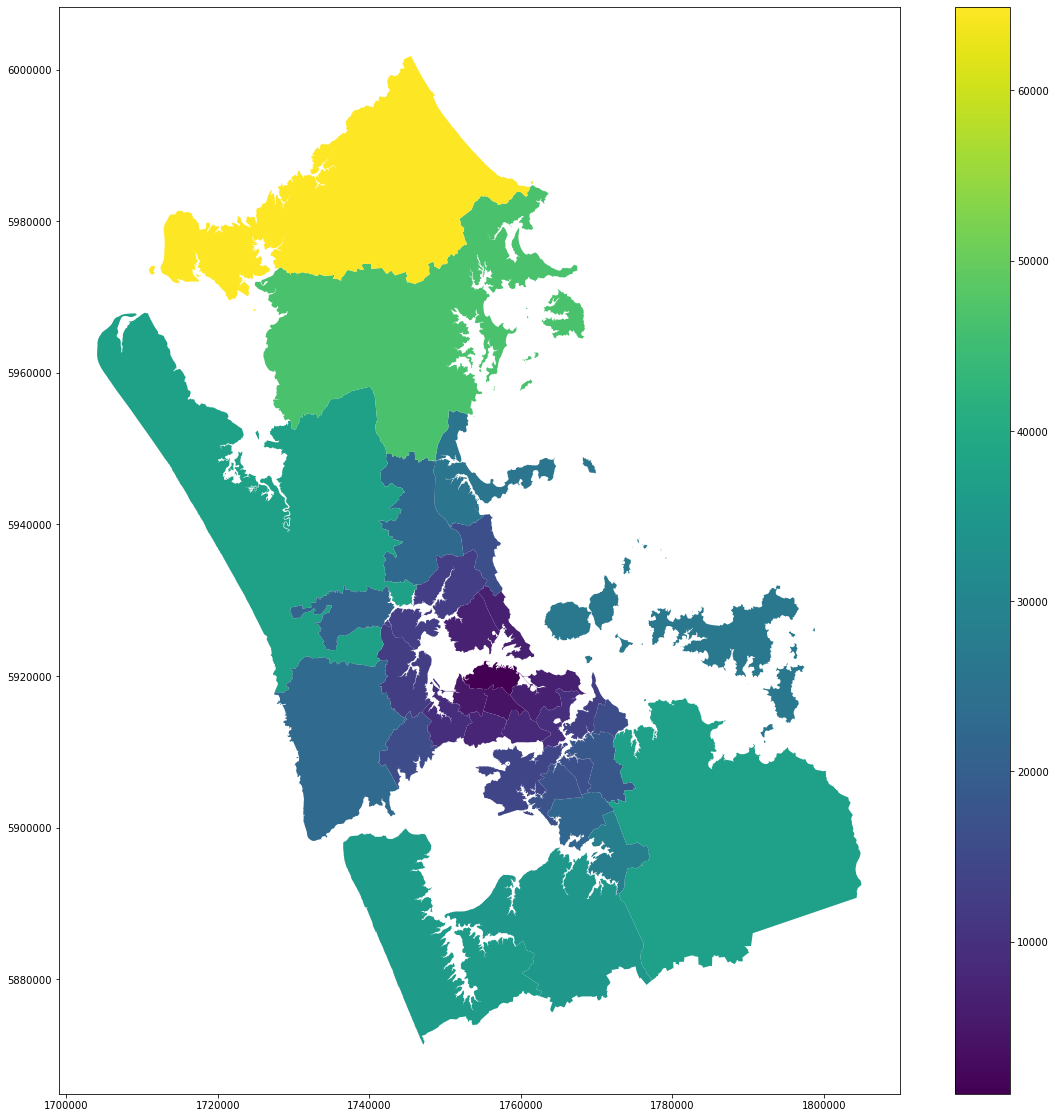

In [79]:
df.plot(column="Hdist_skytower", legend=True)

17.	Indicator (0 or 1) for whether local area is on coastline Coast_indicator

In [80]:
coastline = df.dissolve().boundary.iloc[0]

In [81]:
df["Coast_indicator"] = df.intersects(coastline)
df[["Name", "Coast_indicator"]]

,Name,Coast_indicator
OBJECTID,,
1,Auckland Central,True
2,Beach Haven-Birkenhead-Northcote,True
3,Botany,True
4,Devonport-Takapuna,True
5,East Coast Bays,True
6,Franklin-Beachlands-Hunua,True
7,Franklin-Pukekohe,True
8,Franklin-Waiuku,True
9,Henderson-Massey,True


18.	Total population from 2013 census (sum of constituent meshblocks) Census2013_population

In [82]:
households = pd.read_csv("input/2013-mb-dataset-Total-New-Zealand-Household.csv")
households

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Area_Code_and_Description,Code,Description,2001_Census_total_households_in_occupied_private_dwellings,2006_Census_total_households_in_occupied_private_dwellings,2013_Census_total_households_in_occupied_private_dwellings,2001_Census_household_composition_for_households_in_occupied_private_dwellings_One-family_household_(with_or_without_other_people),2001_Census_household_composition_for_households_in_occupied_private_dwellings_Two-family_household_(with_or_without_other_people),2001_Census_household_composition_for_households_in_occupied_private_dwellings_Three_or_more_family_household_(with_or_without_other_people),2001_Census_household_composition_for_households_in_occupied_private_dwellings_Other_multi-person_household,...,2006_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Not_Elsewhere_Included(22),2006_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_in_occupied_private_dwellings,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_No_Access_to_Telecommunication_Systems,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Cellphone/Mobile_Phone,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Telephone,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Fax_Machine,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_the_Internet,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_stated,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Not_Elsewhere_Included(22),2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_in_occupied_private_dwellings
0,MB 0000100,100,NaN,3.0,3.0,3.0,..C,..C,..C,..C,...,..C,3.0,..C,..C,..C,..C,..C,..C,..C,3.0
1,MB 0000200,200,NaN,27.0,27.0,30.0,15,3,0,0,...,3,24.0,3,9,24,6,15,30,3,30.0
2,MB 0000300,300,NaN,21.0,24.0,21.0,18,3,0,0,...,0,24.0,0,6,12,3,9,18,3,18.0
3,MB 0000400,400,NaN,9.0,9.0,9.0,6,..C,..C,..C,...,..C,12.0,..C,..C,9,..C,6,9,..C,9.0
4,MB 0000501,501,NaN,0.0,0.0,0.0,..C,..C,..C,..C,...,..C,0.0,..C,..C,..C,..C,..C,..C,..C,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49038,Footnotes for specific variables or categories,23,Median total household income is rounded to th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49039,Symbols,..C,Confidential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49040,Symbols,..,not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49041,Symbols,*,not able to be calculated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


40300


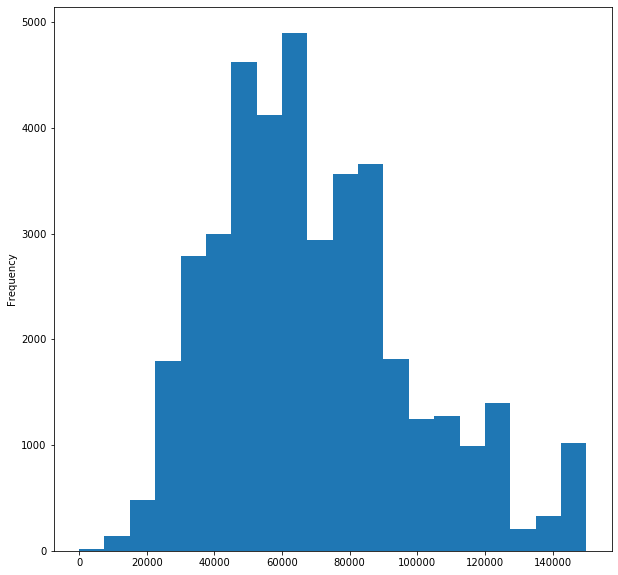

In [83]:
key = "2013_Census_total_household_income_(grouped)(2)(3)(4)_for_households_in_occupied_private_dwellings_Median_household_income_($)(18)(23)"
households_with_income = households[households.Area_Code_and_Description.str.startswith("MB") & (households[key] != "..C") & (households[key] != "*")].copy()
print(len(households_with_income))
households_with_income[key] = households_with_income[key].astype(int)
households_with_income[key].plot(kind="hist", bins=20, figsize=(10,10))

In [84]:
meshblocks = gpd.read_file("input/statsnzpopulation-by-meshblock-2013-census-FGDB.zip!population-by-meshblock-2013-census.gdb")
meshblocks

,Meshblock,MeshblockNumber,Population_Count_Usual_Resident_2013,Population_Count_Census_Night_2013,geometry
0,MB 0352700,0352700,0,0,"MULTIPOLYGON (((1753237.550 5923918.395, 17532..."
1,MB 0728500,0728500,9,6,"MULTIPOLYGON (((1761011.438 5905840.848, 17610..."
2,MB 0829300,0829300,93,99,"MULTIPOLYGON (((1739739.656 5899165.556, 17397..."
3,MB 1280801,1280801,0,0,"MULTIPOLYGON (((1869852.595 5695096.558, 18714..."
4,MB 2360001,2360001,0,0,"MULTIPOLYGON (((1623601.773 5423210.098, 16235..."
...,...,...,...,...,...
46616,MB 0074002,0074002,0,0,"MULTIPOLYGON (((1741178.600 6046572.236, 17414..."
46617,MB 3208002,3208002,78,81,"MULTIPOLYGON (((1770892.430 5911519.906, 17708..."
46618,MB 3208003,3208003,36,36,"MULTIPOLYGON (((1771025.156 5911674.629, 17709..."
46619,MB 3209001,3209001,84,87,"MULTIPOLYGON (((1771731.425 5912665.799, 17717..."


In [85]:
meshblocks.geometry = meshblocks.representative_point()

In [86]:
meshblocks = meshblocks.merge(households, left_on="Meshblock", right_on="Area_Code_and_Description")

In [87]:
meshblocks = gpd.sjoin(df, meshblocks, op="intersects")
meshblocks

,Name,geometry,Centroid_lon,Centroid_lat,Area,Residential_area,SH_area,MHS_area,MHU_area,THA_area,...,2006_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Not_Elsewhere_Included(22),2006_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_in_occupied_private_dwellings,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_No_Access_to_Telecommunication_Systems,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Cellphone/Mobile_Phone,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Telephone,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Fax_Machine,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_the_Internet,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_stated,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Not_Elsewhere_Included(22),2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_in_occupied_private_dwellings
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,..C,9.0,..C,..C,6,..C,..C,6,..C,9.0
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,3,21.0,0,15,18,0,18,18,3,21.0
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,6,30.0,3,24,15,0,12,30,3,33.0
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,..C,9.0,..C,6,9,..C,9,12,..C,12.0
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,9,33.0,6,15,12,0,9,24,9,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,Whau,"MULTIPOLYGON (((1748168.244 5916597.058, 17481...",174.684472,-36.906902,2.682152e+07,1.602986e+07,9.520285e+05,6.562767e+06,6.248986e+06,2.009848e+06,...,3,54.0,0,42,45,6,42,51,6,54.0
33,Whau,"MULTIPOLYGON (((1748168.244 5916597.058, 17481...",174.684472,-36.906902,2.682152e+07,1.602986e+07,9.520285e+05,6.562767e+06,6.248986e+06,2.009848e+06,...,..C,9.0,..C,..C,..C,..C,..C,..C,..C,0.0
33,Whau,"MULTIPOLYGON (((1748168.244 5916597.058, 17481...",174.684472,-36.906902,2.682152e+07,1.602986e+07,9.520285e+05,6.562767e+06,6.248986e+06,2.009848e+06,...,..C,0.0,..C,..C,..C,..C,..C,..C,..C,0.0


In [88]:
group = meshblocks.groupby("OBJECTID")

In [89]:
df["Census2013_population"] = group["Population_Count_Usual_Resident_2013"].sum()

19.	Number of dwellings from 2013 census (sum of constituent meshblocks) Census2013_dwellings

In [90]:
df["Census2013_dwellings"] = group["2013_Census_total_households_in_occupied_private_dwellings"].sum()

20.	Average Household Income (weighted average of constituent meshblock household incomes from 2013 census, where the weights are given by the number of households in each of the constituent meshblocks in the local area) Census2013_avg_HH_income

In [91]:
meshblocks_with_income = meshblocks[(meshblocks[key] != "..C") & (meshblocks[key] != "*")].copy()
meshblocks_with_income[key] = meshblocks_with_income[key].astype(int)
meshblocks_with_income

,Name,geometry,Centroid_lon,Centroid_lat,Area,Residential_area,SH_area,MHS_area,MHU_area,THA_area,...,2006_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Not_Elsewhere_Included(22),2006_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_in_occupied_private_dwellings,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_No_Access_to_Telecommunication_Systems,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Cellphone/Mobile_Phone,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Telephone,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_a_Fax_Machine,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Access_to_the_Internet,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_stated,2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Not_Elsewhere_Included(22),2013_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Total_households_in_occupied_private_dwellings
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,..C,9.0,..C,..C,6,..C,..C,6,..C,9.0
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,3,21.0,0,15,18,0,18,18,3,21.0
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,6,30.0,3,24,15,0,12,30,3,33.0
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,..C,9.0,..C,6,9,..C,9,12,..C,12.0
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,9,33.0,6,15,12,0,9,24,9,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,Whau,"MULTIPOLYGON (((1748168.244 5916597.058, 17481...",174.684472,-36.906902,2.682152e+07,1.602986e+07,9.520285e+05,6.562767e+06,6.248986e+06,2.009848e+06,...,0,54.0,3,39,45,6,42,51,3,54.0
33,Whau,"MULTIPOLYGON (((1748168.244 5916597.058, 17481...",174.684472,-36.906902,2.682152e+07,1.602986e+07,9.520285e+05,6.562767e+06,6.248986e+06,2.009848e+06,...,6,66.0,3,48,51,6,45,66,6,69.0
33,Whau,"MULTIPOLYGON (((1748168.244 5916597.058, 17481...",174.684472,-36.906902,2.682152e+07,1.602986e+07,9.520285e+05,6.562767e+06,6.248986e+06,2.009848e+06,...,6,57.0,0,48,48,9,42,54,3,54.0


In [92]:
meshblocks_with_income["income*dwellings"] = meshblocks_with_income[key] * meshblocks_with_income["2013_Census_total_households_in_occupied_private_dwellings"]
meshblocks_with_income["income*dwellings"]

OBJECTID
1      405000.0
1     2274300.0
1      331200.0
1     1500000.0
1      624000.0
        ...    
33    2565000.0
33    3622500.0
33    4860000.0
33    3900000.0
33    3331800.0
Name: income*dwellings, Length: 10830, dtype: float64

In [93]:
group = meshblocks_with_income.groupby("OBJECTID")
df["Census2013_avg_HH_income"] = group["income*dwellings"].sum() / group["2013_Census_total_households_in_occupied_private_dwellings"].sum()

In [94]:
df[["Name", "Census2013_population", "Census2013_dwellings", "Census2013_avg_HH_income"]].sort_values(by="Census2013_population", ascending=False)

,Name,Census2013_population,Census2013_dwellings,Census2013_avg_HH_income
OBJECTID,,,,
9,Henderson-Massey,107658,34461.0,68347.842761
2,Beach Haven-Birkenhead-Northcote,82431,28344.0,80154.552207
13,Manurewa,82230,22584.0,69202.861326
17,Orakei,79581,29001.0,110143.425140
1,Auckland Central,77058,31506.0,86499.398108
33,Whau,72585,23928.0,65948.529781
12,Mangere-Otahuhu,70998,17427.0,61855.553636
4,Devonport-Takapuna,55398,20307.0,89560.517751
30,Upper Harbour Local Board Area,53571,17079.0,92354.882984


In [95]:
df

,Name,geometry,Centroid_lon,Centroid_lat,Area,Residential_area,SH_area,MHS_area,MHU_area,THA_area,...,FU_area,HGI_area,Business_area,Rural_area,Open_area,Hdist_skytower,Coast_indicator,Census2013_population,Census2013_dwellings,Census2013_avg_HH_income
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,Auckland Central,"POLYGON ((1755802.315 5921956.091, 1755861.443...",174.753763,-36.855194,1.942334e+07,6.114247e+06,3.264382e+06,1.005111e+06,9.761411e+05,8.686144e+05,...,0.000000e+00,0.000000e+00,4.770257e+06,0.000000e+00,2.505081e+06,1067.517983,True,77058,31506.0,86499.398108
2,Beach Haven-Birkenhead-Northcote,"POLYGON ((1757287.966 5925962.738, 1757211.333...",174.721897,-36.794764,3.406603e+07,1.989760e+07,5.073543e+06,1.007797e+07,3.677952e+06,9.609651e+05,...,0.000000e+00,0.000000e+00,2.554498e+06,0.000000e+00,6.442079e+06,6948.094501,True,82431,28344.0,80154.552207
3,Botany,"POLYGON ((1770748.846 5912611.168, 1770889.893...",174.917904,-36.957505,3.978830e+07,1.437879e+07,4.003298e+05,9.023214e+06,2.665899e+06,1.402369e+06,...,0.000000e+00,0.000000e+00,6.222613e+06,9.837755e+06,4.056828e+06,18420.075506,True,46878,13893.0,93325.464764
4,Devonport-Takapuna,"POLYGON ((1755276.581 5932026.336, 1755278.305...",174.769923,-36.789009,2.111121e+07,1.240583e+07,2.595033e+06,6.760630e+06,2.528557e+06,5.216074e+05,...,0.000000e+00,0.000000e+00,1.165067e+06,0.000000e+00,2.289014e+06,6621.239572,True,55398,20307.0,89560.517751
5,East Coast Bays,"POLYGON ((1756125.006 5940268.048, 1756139.852...",174.733122,-36.701804,3.038568e+07,1.402263e+07,2.429714e+06,8.490284e+06,9.649423e+05,2.219014e+05,...,0.000000e+00,0.000000e+00,3.126271e+05,7.860819e+06,3.829094e+06,16467.095662,True,44634,15354.0,96602.171362
6,Franklin-Beachlands-Hunua,"MULTIPOLYGON (((1804302.354 5890738.079, 17905...",175.101754,-37.043410,7.778987e+08,7.835879e+06,6.069391e+06,3.296486e+04,0.000000e+00,3.034730e+04,...,1.048487e+07,0.000000e+00,3.582480e+06,4.948783e+08,8.000078e+07,37193.822526,True,21111,7332.0,97416.701031
7,Franklin-Pukekohe,"POLYGON ((1765085.620 5897344.807, 1765096.229...",174.864884,-37.151426,2.717220e+08,1.622679e+07,6.467033e+06,5.660850e+06,3.079772e+06,3.792095e+05,...,2.256611e+07,0.000000e+00,1.981925e+06,2.111716e+08,4.301604e+06,34851.656145,True,31176,10863.0,78094.119279
8,Franklin-Waiuku,"POLYGON ((1744829.308 5899882.633, 1744835.760...",174.666624,-37.164727,2.997611e+08,7.599913e+06,4.391057e+05,2.379868e+06,1.111391e+05,0.000000e+00,...,1.885628e+05,0.000000e+00,5.024976e+06,2.704684e+08,4.015675e+06,36121.662648,True,13581,5046.0,68150.358852
9,Henderson-Massey,"POLYGON ((1745963.138 5923457.510, 1745945.884...",174.621864,-36.853375,5.321961e+07,3.041467e+07,5.403257e+06,6.196787e+06,1.438878e+07,4.167398e+06,...,2.356178e+06,0.000000e+00,5.410361e+06,6.572595e+05,5.824062e+06,12525.129414,True,107658,34461.0,68347.842761


In [96]:
df.drop(columns="geometry").to_csv("output/Local_Area.csv")

## Meshblock 2018 dataset:
1.	Meshblock numeric code Code
2.	Centroid longitude Centroid_lon
3.	Centroid latitude Centroid_lat

In [33]:
mb = gpd.read_file("input/statsnzmeshblock-higher-geographies-2018-generalised-FGDB.zip!meshblock-higher-geographies-2018-generalised.gdb")

In [34]:
mb = mb[(mb.TA2018_V1_00_NAME == "Auckland") & mb.LANDWATER_NAME.isin(["Mainland", "Island"])]

In [35]:
mb = mb.rename(columns={"MB2018_V1_00": "Code"})
mb["Centroid_lon"] = mb.centroid.x
mb["Centroid_lat"] = mb.centroid.y
mb

,Code,SA12018_V1_00,SA22018_V1_00,SA22018_V1_00_NAME,UR2018_V1_00,UR2018_V1_00_NAME,IUR2018_V1_00,IUR2018_V1_00_NAME,CB2018_V1_00,CB2018_V1_00_NAME,...,WARD2018_V1_00,WARD2018_V1_00_NAME,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Centroid_lon,Centroid_lat
543,0137200,7001157,110400,Cape Rodney,1098,Other rural Auckland,22,Rural other,07601,Rodney Local Board Area,...,07601,Rodney Ward,11,Island,0.097567,0.097567,1356.404986,"MULTIPOLYGON (((1761489.925 5985285.678, 17614...",1.761464e+06,5.985098e+06
544,0170700,7001317,114300,Gulf Islands,1098,Other rural Auckland,22,Rural other,07602,Hibiscus and Bays Local Board Area,...,07602,Albany Ward,11,Island,0.005545,0.005545,321.185380,"MULTIPOLYGON (((1753753.763 5954256.206, 17537...",1.753808e+06,5.954210e+06
545,0438700,7001130,111800,Barrier Islands,1098,Other rural Auckland,22,Rural other,07608,Great Barrier Local Board Area,...,07605,Waitemata and Gulf Ward,11,Island,70.725594,70.725594,100201.649851,"MULTIPOLYGON (((1815954.125 6007877.906, 18159...",1.814416e+06,6.001384e+06
546,0439306,7001135,111800,Barrier Islands,1109,Tryphena,21,Rural settlement,07608,Great Barrier Local Board Area,...,07605,Waitemata and Gulf Ward,11,Island,0.078233,0.078233,1494.370224,"MULTIPOLYGON (((1823569.424 5979782.392, 18235...",1.823537e+06,5.979605e+06
547,0439307,7001135,111800,Barrier Islands,1109,Tryphena,21,Rural settlement,07608,Great Barrier Local Board Area,...,07605,Waitemata and Gulf Ward,11,Island,0.475337,0.475337,3408.621475,"MULTIPOLYGON (((1824128.365 5979223.530, 18242...",1.823950e+06,5.978887e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53299,4011884,7001155,110400,Cape Rodney,1073,Whangateau,21,Rural settlement,07601,Rodney Local Board Area,...,07601,Rodney Ward,12,Mainland,1.161280,1.161280,7266.530123,"MULTIPOLYGON (((1759217.632 5980700.819, 17596...",1.758846e+06,5.980192e+06
53301,4011883,7001154,110400,Cape Rodney,1098,Other rural Auckland,22,Rural other,07601,Rodney Local Board Area,...,07601,Rodney Ward,12,Mainland,7.680889,7.680889,17076.458542,"MULTIPOLYGON (((1756196.931 5982761.262, 17562...",1.757339e+06,5.980998e+06
53333,4011925,7009199,156900,Baverstock,1108,Auckland,11,Major urban area,07616,Howick Local Board Area,...,07610,Howick Ward,12,Mainland,0.242189,0.242189,2352.598074,"MULTIPOLYGON (((1770681.901 5909197.803, 17711...",1.771009e+06,5.908956e+06
53359,4011971,7009313,158600,Ormiston East,1108,Auckland,11,Major urban area,07616,Howick Local Board Area,...,07610,Howick Ward,12,Mainland,0.487587,0.487587,3692.342983,"MULTIPOLYGON (((1771223.196 5906518.069, 17715...",1.771828e+06,5.906150e+06


In [36]:
mb = mb.set_index("Code")

4.	Haversine distance from centroid to Skytower Hdist_skytower

In [37]:
skytower = Point(1757109.809, 5920500.841)
mb["Hdist_skytower"] = mb.centroid.distance(skytower) # meters
mb

,SA12018_V1_00,SA22018_V1_00,SA22018_V1_00_NAME,UR2018_V1_00,UR2018_V1_00_NAME,IUR2018_V1_00,IUR2018_V1_00_NAME,CB2018_V1_00,CB2018_V1_00_NAME,CON2018_V1_00,...,WARD2018_V1_00_NAME,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Centroid_lon,Centroid_lat,Hdist_skytower
Code,,,,,,,,,,,,,,,,,,,,,
0137200,7001157,110400,Cape Rodney,1098,Other rural Auckland,22,Rural other,07601,Rodney Local Board Area,0299,...,Rodney Ward,11,Island,0.097567,0.097567,1356.404986,"MULTIPOLYGON (((1761489.925 5985285.678, 17614...",1.761464e+06,5.985098e+06,64744.057618
0170700,7001317,114300,Gulf Islands,1098,Other rural Auckland,22,Rural other,07602,Hibiscus and Bays Local Board Area,0299,...,Albany Ward,11,Island,0.005545,0.005545,321.185380,"MULTIPOLYGON (((1753753.763 5954256.206, 17537...",1.753808e+06,5.954210e+06,33870.034882
0438700,7001130,111800,Barrier Islands,1098,Other rural Auckland,22,Rural other,07608,Great Barrier Local Board Area,0299,...,Waitemata and Gulf Ward,11,Island,70.725594,70.725594,100201.649851,"MULTIPOLYGON (((1815954.125 6007877.906, 18159...",1.814416e+06,6.001384e+06,99126.852773
0439306,7001135,111800,Barrier Islands,1109,Tryphena,21,Rural settlement,07608,Great Barrier Local Board Area,0299,...,Waitemata and Gulf Ward,11,Island,0.078233,0.078233,1494.370224,"MULTIPOLYGON (((1823569.424 5979782.392, 18235...",1.823537e+06,5.979605e+06,88914.804842
0439307,7001135,111800,Barrier Islands,1109,Tryphena,21,Rural settlement,07608,Great Barrier Local Board Area,0299,...,Waitemata and Gulf Ward,11,Island,0.475337,0.475337,3408.621475,"MULTIPOLYGON (((1824128.365 5979223.530, 18242...",1.823950e+06,5.978887e+06,88749.923755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011884,7001155,110400,Cape Rodney,1073,Whangateau,21,Rural settlement,07601,Rodney Local Board Area,0299,...,Rodney Ward,12,Mainland,1.161280,1.161280,7266.530123,"MULTIPOLYGON (((1759217.632 5980700.819, 17596...",1.758846e+06,5.980192e+06,59716.438951
4011883,7001154,110400,Cape Rodney,1098,Other rural Auckland,22,Rural other,07601,Rodney Local Board Area,0299,...,Rodney Ward,12,Mainland,7.680889,7.680889,17076.458542,"MULTIPOLYGON (((1756196.931 5982761.262, 17562...",1.757339e+06,5.980998e+06,60497.860816
4011925,7009199,156900,Baverstock,1108,Auckland,11,Major urban area,07616,Howick Local Board Area,0299,...,Howick Ward,12,Mainland,0.242189,0.242189,2352.598074,"MULTIPOLYGON (((1770681.901 5909197.803, 17711...",1.771009e+06,5.908956e+06,18068.596395


Text(0.5, 1, 'Meshblocks <5KM from the Skytower')

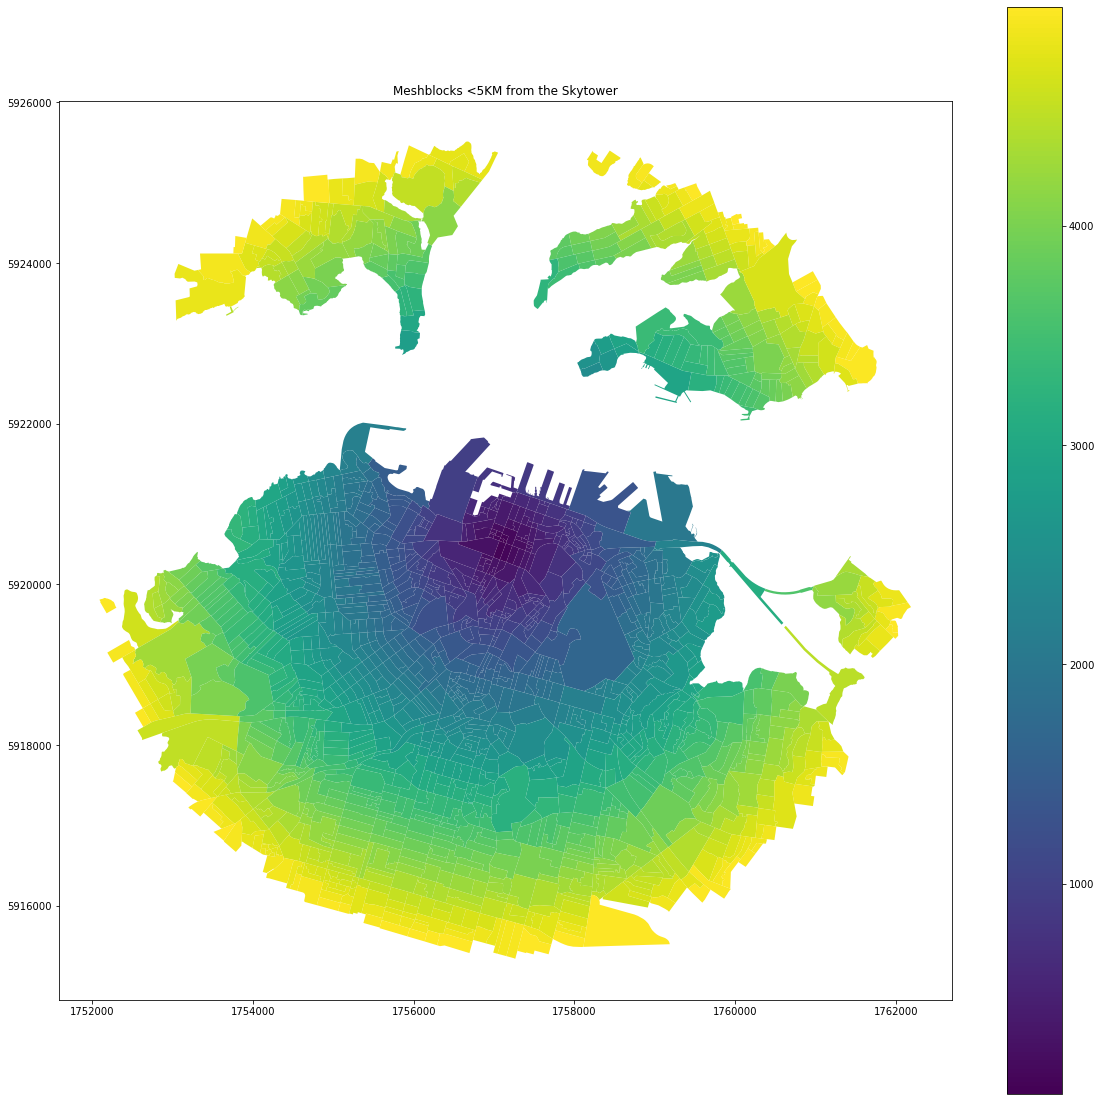

In [38]:
mb[mb.Hdist_skytower < 5000].plot(column="Hdist_skytower", legend=True)
plt.title("Meshblocks <5KM from the Skytower")

5.	Minimum Haversine distance from centroid to coast Hdist_coast

In [39]:
coastline = gpd.read_file("input/lds-nz-coastlines-and-islands-polygons-topo-150k-FGDB.zip!nz-coastlines-and-islands-polygons-topo-150k.gdb")

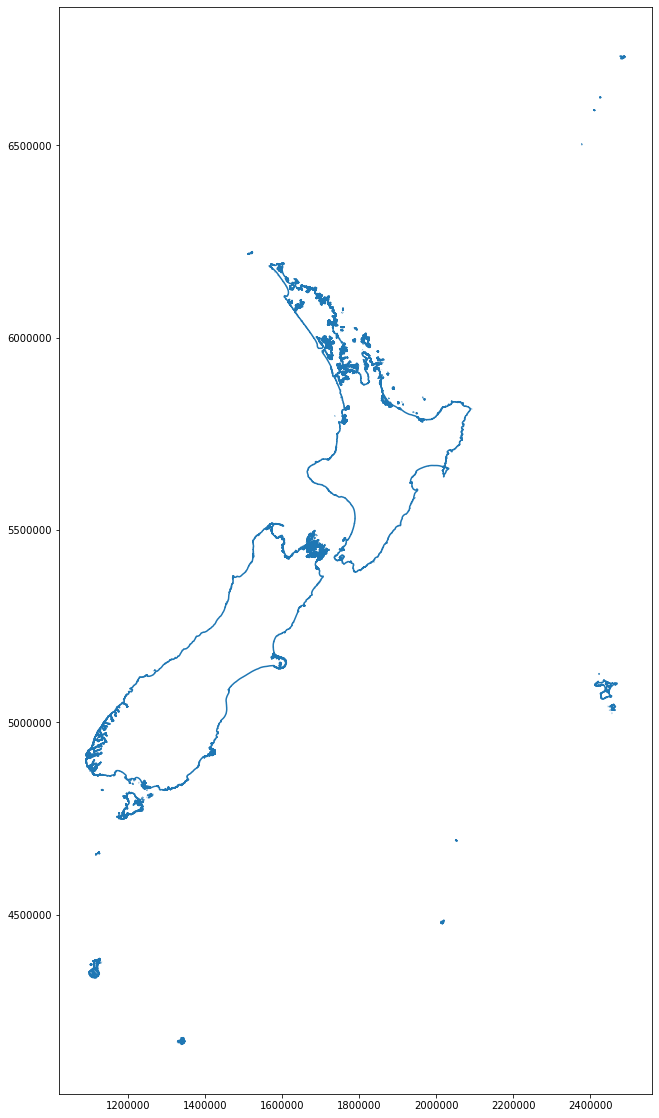

In [40]:
coastline.boundary.plot()

In [41]:
coastline = coastline.dissolve().boundary.iloc[0]

In [42]:
%%time
mb["Hdist_coast"] = [point.distance(coastline) for point in tqdm(mb.centroid)]

  0%|          | 0/13441 [00:00<?, ?it/s]

CPU times: user 1min 29s, sys: 253 ms, total: 1min 30s
Wall time: 1min 29s


In [43]:
mb["Hdist_coast"].describe() # meters

count    13441.000000
mean      1596.010824
std       1792.477098
min          0.488582
25%        444.163564
50%       1076.033671
75%       2116.959738
max      16027.664069
Name: Hdist_coast, dtype: float64

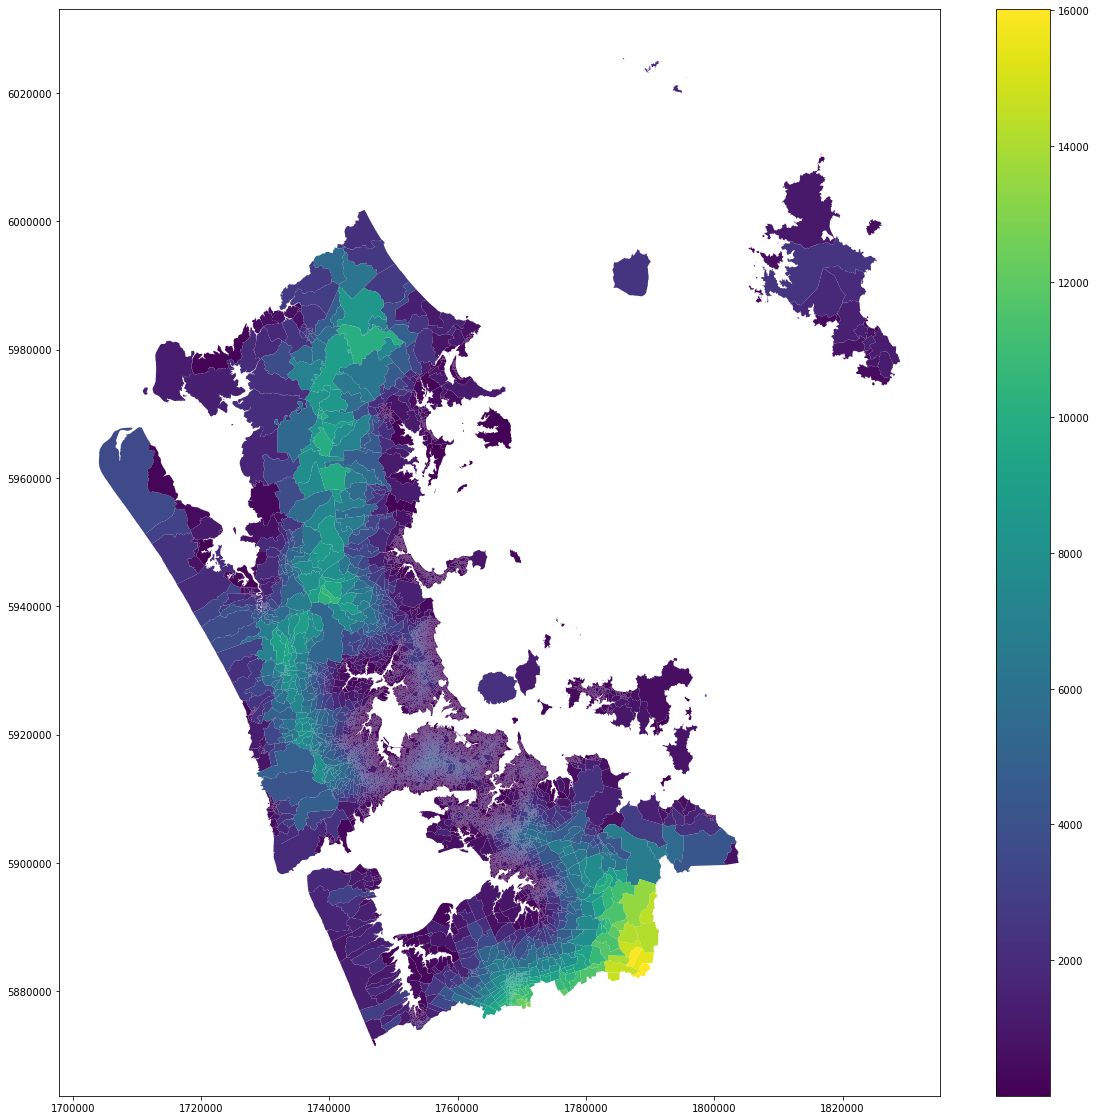

In [44]:
mb.plot(column="Hdist_coast", legend=True)

6.	Manhattan distance from centroid to Skytower Mdist_skytower

OSRM API docs - http://project-osrm.org/docs/v5.24.0/api/#table-service

In [45]:
len(mb)

13441

In [46]:
BASE_URL = "http://osrm.auckland-cer.cloud.edu.au"
def drive(points, to):
    points = [f"{point.x},{point.y}" for point in points]
    points = ";".join(points)
    result = requests.get(f"{BASE_URL}/table/v1/driving/{to};{points}?destinations=0&annotations=duration,distance")
    return result.json()

In [47]:
skytower = "174.76218883819053,-36.848429166610735"

In [48]:
%%time
result = drive(points=mb.centroid.to_crs(epsg=4326), to=skytower)

CPU times: user 1.41 s, sys: 50 µs, total: 1.41 s
Wall time: 1min 14s


In [49]:
result.keys()

dict_keys(['code', 'sources', 'destinations', 'durations', 'distances'])

In [50]:
mb["Mdist_skytower"] = [r[0] for r in result["distances"][1:]]
mb["Mdist_skytower"].describe() # Units are meters

count     13441.000000
mean      21083.293989
std       15682.240482
min          59.500000
25%       11506.700000
50%       17201.300000
75%       24218.100000
max      136633.200000
Name: Mdist_skytower, dtype: float64

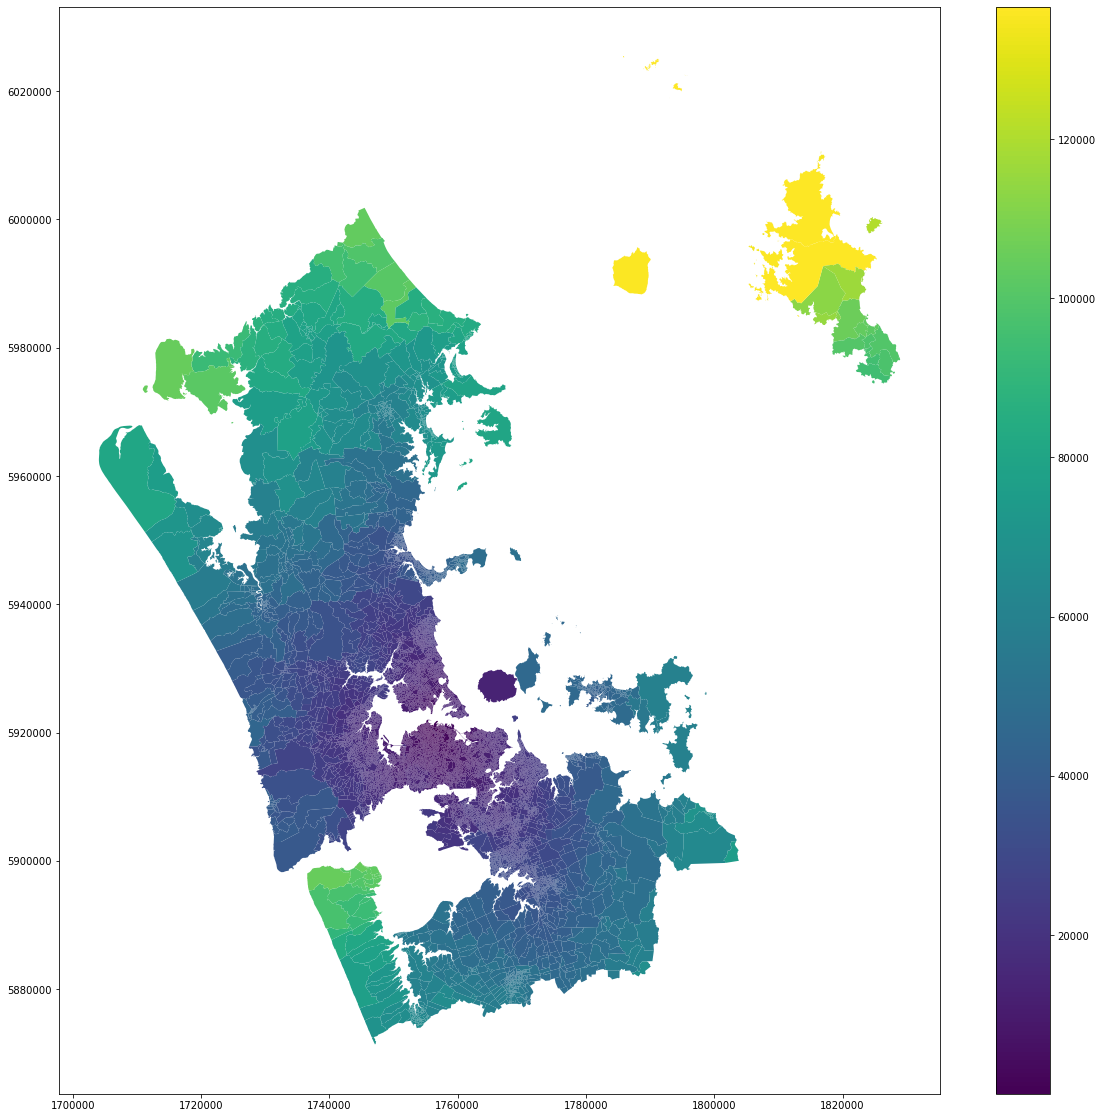

In [51]:
mb.plot(column="Mdist_skytower", legend=True)

Text(0.5, 1, 'Meshblocks <5KM driving from the Skytower')

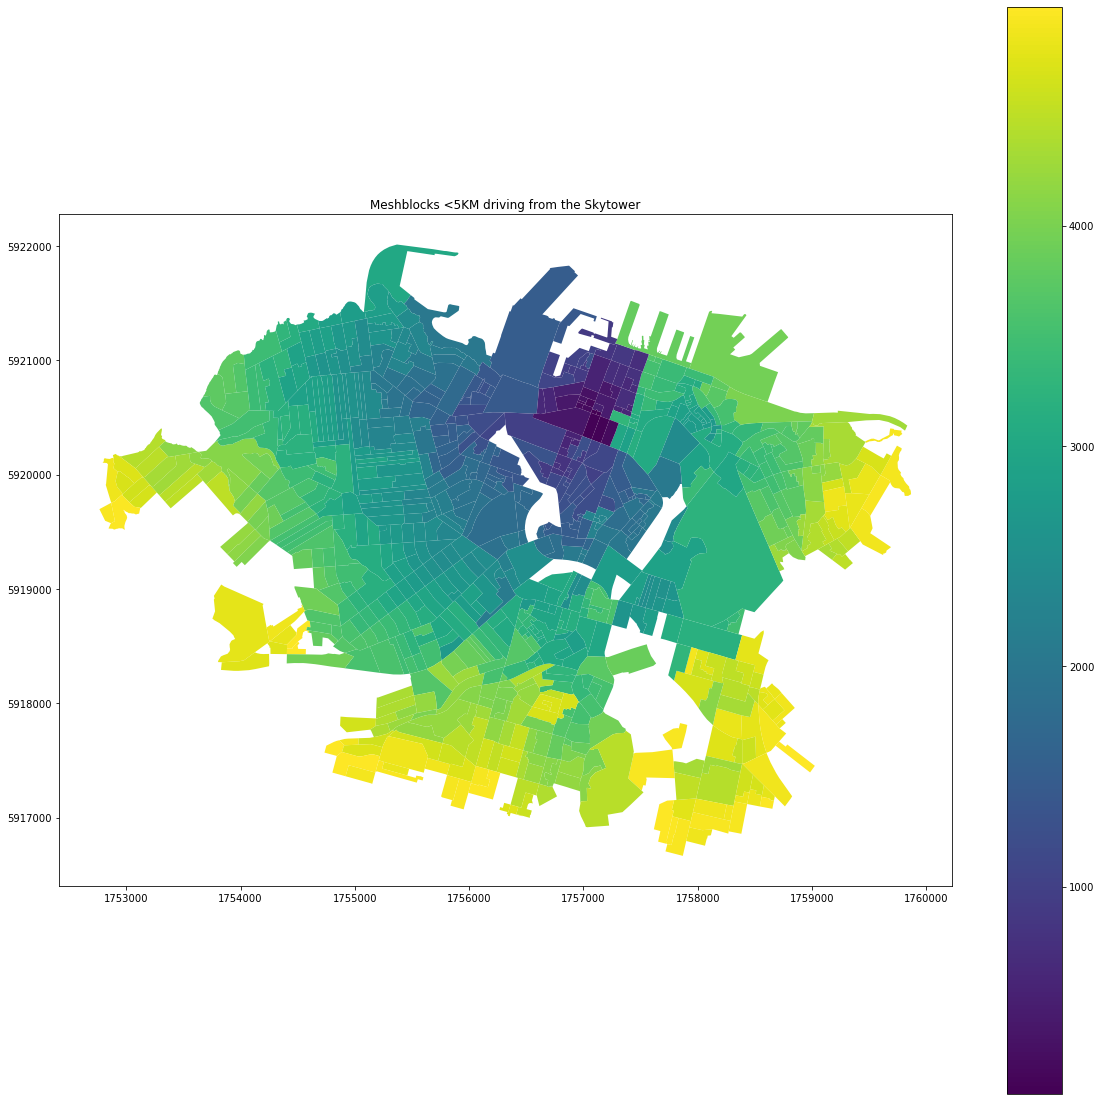

In [52]:
mb[mb.Mdist_skytower < 5000].plot(column="Mdist_skytower", legend=True)
plt.title("Meshblocks <5KM driving from the Skytower")

In [53]:
# Some strange gaps there - let's investigate
points = mb[(mb.Hdist_skytower < 1000) & (mb.Mdist_skytower > 5000)]
points = [f"{point.x},{point.y}" for point in points.centroid.to_crs(epsg=4326)]
points

['174.75624867471396,-36.85383185528419',
 '174.75345762242358,-36.850503483712096',
 '174.75551843174853,-36.8526249602678',
 '174.75734772557055,-36.855642008978414']

In [54]:
routes = []
for point in points:
    route_result = requests.get(f"{BASE_URL}/route/v1/driving/{skytower};{point}?geometries=geojson")
    routes.extend(route_result.json()["routes"])
routes

[{'geometry': {'coordinates': [[174.762021, -36.848507],
    [174.762081, -36.848111],
    [174.761663, -36.847994],
    [174.760279, -36.851092],
    [174.756401, -36.856918],
    [174.756298, -36.858244],
    [174.757545, -36.859416],
    [174.761092, -36.859842],
    [174.763064, -36.860822],
    [174.764566, -36.862759],
    [174.766927, -36.864565],
    [174.768415, -36.867436],
    [174.774277, -36.87211],
    [174.774115, -36.872578],
    [174.773385, -36.872143],
    [174.771509, -36.870028],
    [174.768209, -36.867454],
    [174.766746, -36.864588],
    [174.764693, -36.863068],
    [174.76298, -36.861326],
    [174.761243, -36.860494],
    [174.758161, -36.860144],
    [174.756868, -36.859449],
    [174.755729, -36.85724],
    [174.756435, -36.854967],
    [174.756232, -36.853838]],
   'type': 'LineString'},
  'legs': [{'steps': [],
    'distance': 6623.4,
    'duration': 471.2,
    'summary': '',
    'weight': 482.5}],
  'distance': 6623.4,
  'duration': 471.2,
  'weight_na

In [55]:
route_df = pd.read_json(json.dumps(routes))
route_df["geometry"] = route_df['geometry'].apply(shape)
route_df = gpd.GeoDataFrame(route_df)
route_df

,geometry,legs,distance,duration,weight_name,weight
0,"LINESTRING (174.76202 -36.84851, 174.76208 -36...","[{'steps': [], 'distance': 6623.4, 'duration':...",6623.4,471.2,routability,482.5
1,"LINESTRING (174.76202 -36.84851, 174.76197 -36...","[{'steps': [], 'distance': 1487.9, 'duration':...",1487.9,201.1,routability,212.4
2,"LINESTRING (174.76202 -36.84851, 174.76208 -36...","[{'steps': [], 'distance': 11247.2, 'duration'...",11247.2,783.1,routability,794.4
3,"LINESTRING (174.76202 -36.84851, 174.76197 -36...","[{'steps': [], 'distance': 1022.2, 'duration':...",1022.2,135.0,routability,146.3


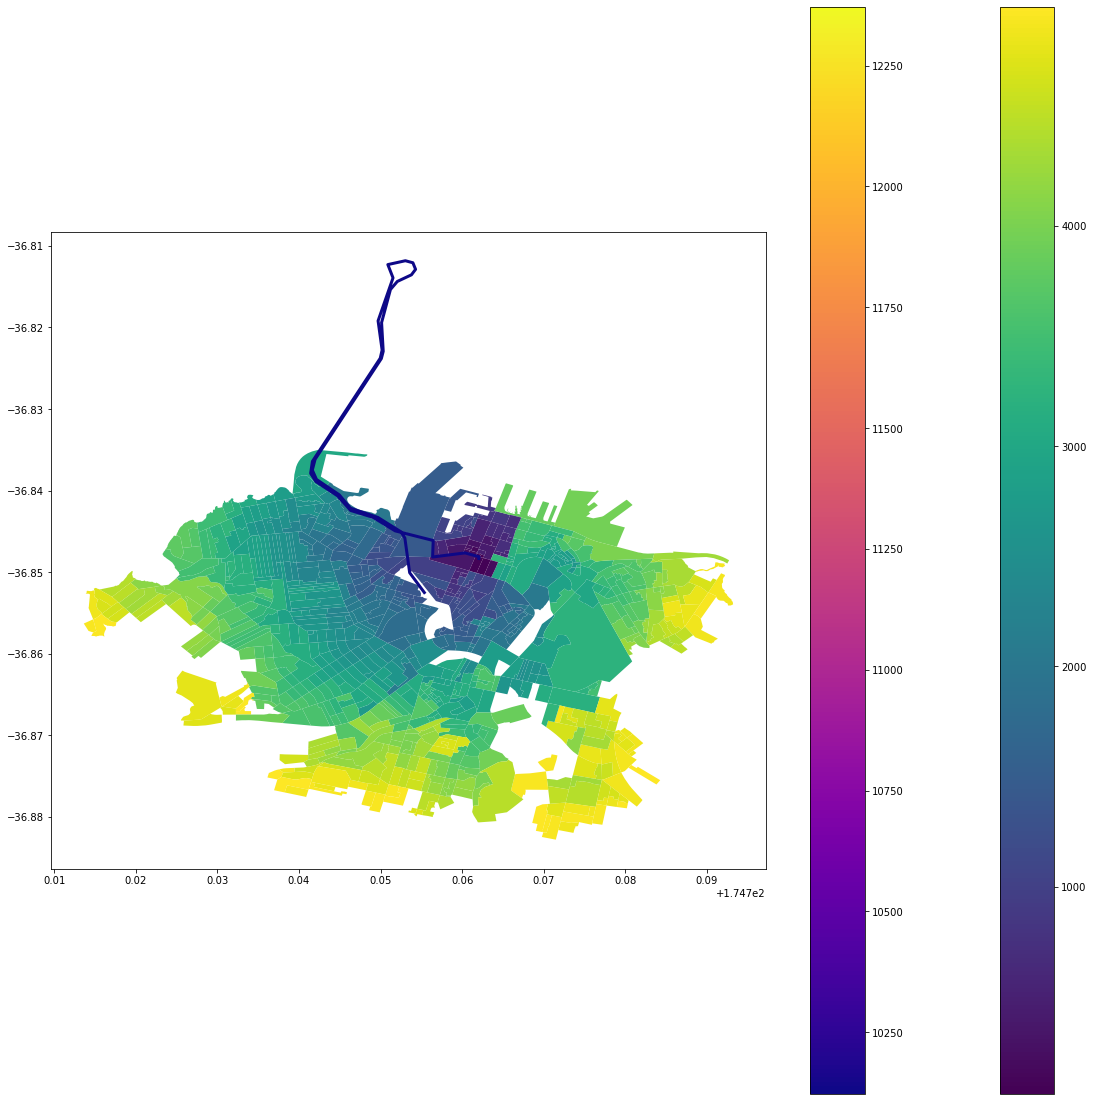

In [56]:
from shapely.geometry import shape
ax = mb[mb.Mdist_skytower < 5000].to_crs(epsg=4326).plot(column="Mdist_skytower", legend=True)
route_df[route_df["distance"]>10000].plot(column="distance", legend=True, ax=ax, linewidth=3, cmap="plasma")

In [57]:
points = mb[(mb.Hdist_skytower < 1000) & (mb.Mdist_skytower > 5000)]
points = [f"{point.y},{point.x}" for point in points.centroid.to_crs(epsg=4326)]
for point in points:
    print(f"https://map.project-osrm.org/?loc={point}&loc=-36.848429166610735,174.76218883819053&srv=0")

https://map.project-osrm.org/?loc=-36.85383185528419,174.75624867471396&loc=-36.848429166610735,174.76218883819053&srv=0
https://map.project-osrm.org/?loc=-36.850503483712096,174.75345762242358&loc=-36.848429166610735,174.76218883819053&srv=0
https://map.project-osrm.org/?loc=-36.8526249602678,174.75551843174853&loc=-36.848429166610735,174.76218883819053&srv=0
https://map.project-osrm.org/?loc=-36.855642008978414,174.75734772557055&loc=-36.848429166610735,174.76218883819053&srv=0


In [60]:
%%time
north = drive(points=mb.centroid.translate(yoff=-100).to_crs(epsg=4326), to=skytower)
west = drive(points=mb.centroid.translate(xoff=-100).to_crs(epsg=4326), to=skytower)
east = drive(points=mb.centroid.translate(xoff=100).to_crs(epsg=4326), to=skytower)
south = drive(points=mb.centroid.translate(yoff=100).to_crs(epsg=4326), to=skytower)

CPU times: user 10.6 s, sys: 30.6 ms, total: 10.7 s
Wall time: 5min 6s


In [68]:
mb["Mdist_skytower_center"] = [r[0] for r in result["distances"][1:]]
mb["Mdist_skytower_north"] = [r[0] for r in north["distances"][1:]]
mb["Mdist_skytower_west"] = [r[0] for r in west["distances"][1:]]
mb["Mdist_skytower_east"] = [r[0] for r in east["distances"][1:]]
mb["Mdist_skytower_south"] = [r[0] for r in south["distances"][1:]]
mb[["Mdist_skytower_center",
    "Mdist_skytower_north",
    "Mdist_skytower_west",
    "Mdist_skytower_east",
    "Mdist_skytower_south"]].describe()

,Mdist_skytower_center,Mdist_skytower_north,Mdist_skytower_west,Mdist_skytower_east,Mdist_skytower_south
count,13441.000000,13441.000000,13441.000000,13441.000000,13441.000000
mean,21083.293989,21104.614404,21076.932974,21080.920289,21044.649126
std,15682.240482,15672.937314,15680.363394,15684.086849,15692.827461
min,59.500000,29.900000,110.700000,155.200000,109.600000
25%,11506.700000,11517.900000,11485.800000,11514.800000,11467.600000
50%,17201.300000,17168.500000,17202.300000,17154.200000,17146.600000
75%,24218.100000,24276.600000,24203.500000,24235.700000,24178.300000
max,136633.200000,136633.200000,136633.200000,136633.200000,136633.200000


In [69]:
mb["Mdist_skytower"] = mb[[
    "Mdist_skytower_center",
    "Mdist_skytower_north",
    "Mdist_skytower_west",
    "Mdist_skytower_east",
    "Mdist_skytower_south"
]].min(axis=1)
(mb["Mdist_skytower_center"] - mb["Mdist_skytower"]).describe()

count    13441.000000
mean       270.629648
std        506.630148
min          0.000000
25%         81.500000
50%        131.900000
75%        261.300000
max      12976.900000
dtype: float64

Text(0.5, 1, 'Meshblocks <5KM driving from the Skytower')

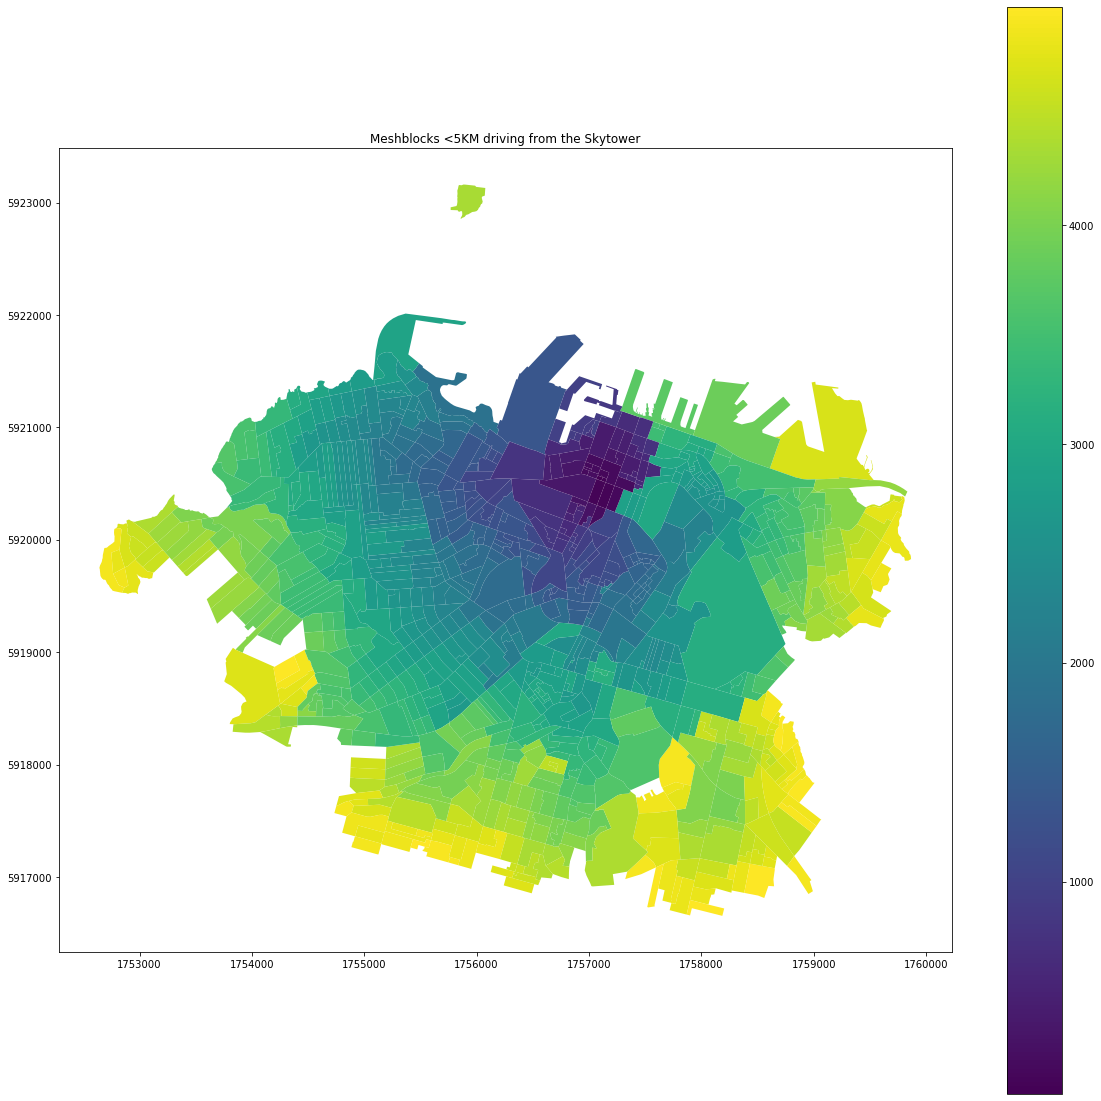

In [70]:
mb[mb.Mdist_skytower < 5000].plot(column="Mdist_skytower", legend=True)
plt.title("Meshblocks <5KM driving from the Skytower")

In [71]:
mb["Mtime_skytower_center"] = [r[0] for r in result["durations"][1:]]
mb["Mtime_skytower_north"] = [r[0] for r in north["durations"][1:]]
mb["Mtime_skytower_west"] = [r[0] for r in west["durations"][1:]]
mb["Mtime_skytower_east"] = [r[0] for r in east["durations"][1:]]
mb["Mtime_skytower_south"] = [r[0] for r in south["durations"][1:]]
display(mb[[
    "Mtime_skytower_center",
    "Mtime_skytower_north",
    "Mtime_skytower_west",
    "Mtime_skytower_east",
    "Mtime_skytower_south"
]].describe())
mb["Mtime_skytower"] = mb[[
    "Mtime_skytower_center",
    "Mtime_skytower_north",
    "Mtime_skytower_west",
    "Mtime_skytower_east",
    "Mtime_skytower_south"
]].min(axis=1)
mb["Mtime_skytower"].describe() # Units are seconds

,Mtime_skytower_center,Mtime_skytower_north,Mtime_skytower_west,Mtime_skytower_east,Mtime_skytower_south
count,13441.000000,13441.000000,13441.000000,13441.000000,13441.000000
mean,1594.367316,1593.642854,1592.224001,1592.324723,1590.448925
std,3358.619612,3358.274390,3358.655563,3357.112345,3358.303358
min,15.100000,7.200000,26.700000,38.900000,37.900000
25%,867.000000,863.700000,865.100000,862.400000,862.400000
50%,1163.400000,1160.600000,1160.800000,1160.200000,1159.400000
75%,1514.500000,1510.900000,1510.600000,1511.700000,1508.300000
max,70521.800000,70521.800000,70521.800000,70521.800000,70521.800000


count    13441.000000
mean      1568.247095
std       3357.297496
min          7.200000
25%        841.300000
50%       1138.400000
75%       1485.000000
max      70521.800000
Name: Mtime_skytower, dtype: float64

Text(0.5, 1, 'Meshblocks < 20 minutes drive from the Skytower')

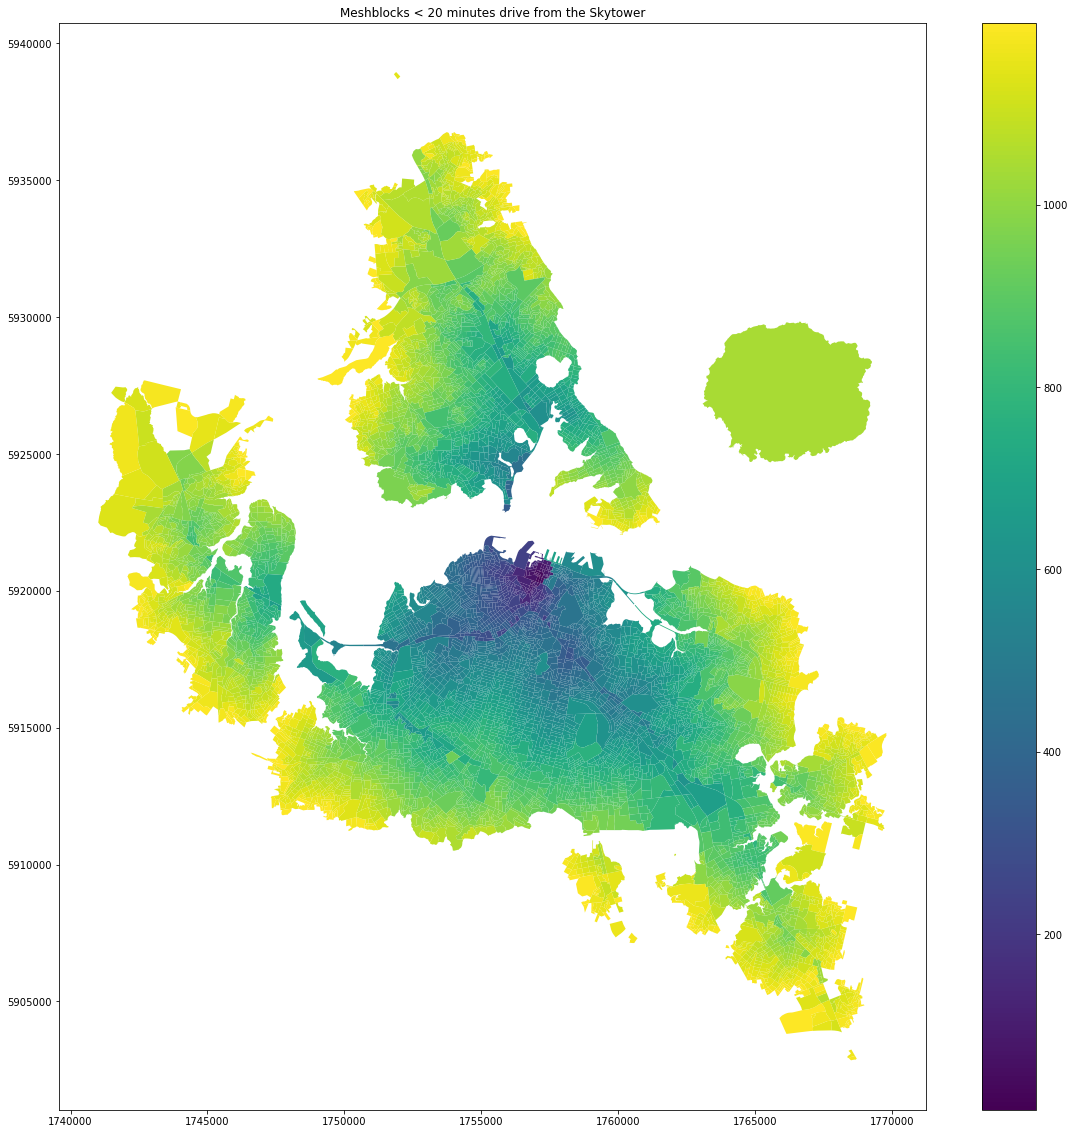

In [72]:
mb[mb.Mtime_skytower < 60*20].plot(column="Mtime_skytower", legend=True)
plt.title("Meshblocks < 20 minutes drive from the Skytower")

In [73]:
mb.drop(columns="geometry").to_csv("output/2018_Meshblocks.csv")